In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn import preprocessing

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


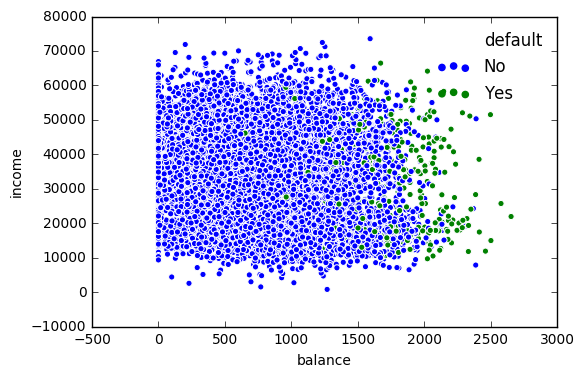

In [2]:
data = pd.read_excel("./Data/Default.xlsx")
sns.scatterplot(x = 'balance', y= 'income',hue = 'default', data= data)
data.describe()


(483, 4)


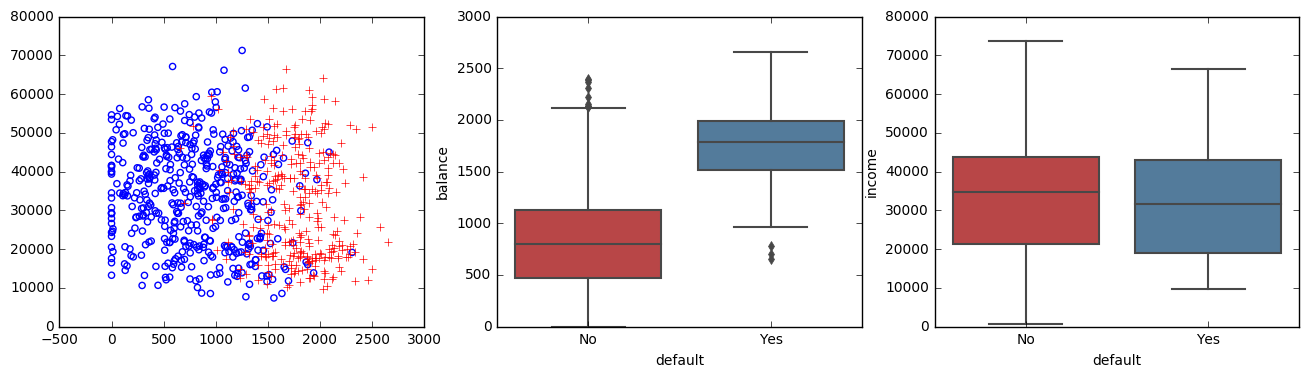

In [3]:
default_yes =  data.groupby('default').get_group('Yes').sample(frac = 1)
default_no =  data.groupby('default').get_group('No').sample(frac = 0.05)
print default_no.shape

fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,4))
ax1.plot(default_yes['balance'],default_yes['income'],'r+')
ax1.scatter(default_no['balance'],default_no['income'],facecolors='none', edgecolors='b')

sns.set_palette("Set1", 8, .75)
sns.boxplot(x= 'default', y = 'balance', data = data, ax = ax2,)
sns.boxplot(x= 'default', y = 'income', data = data, ax = ax3,)

plt.show()

  default student      balance        income  default_label  student_yes
1      No      No   729.526495  44361.625074              0            0
2      No     Yes   817.180407  12106.134700              0            1
3      No      No  1073.549164  31767.138947              0            0
4      No      No   529.250605  35704.493935              0            0
5      No      No   785.655883  38463.495879              0            0
Intercept: -10.3269
Balance Coefficient: 0.0053


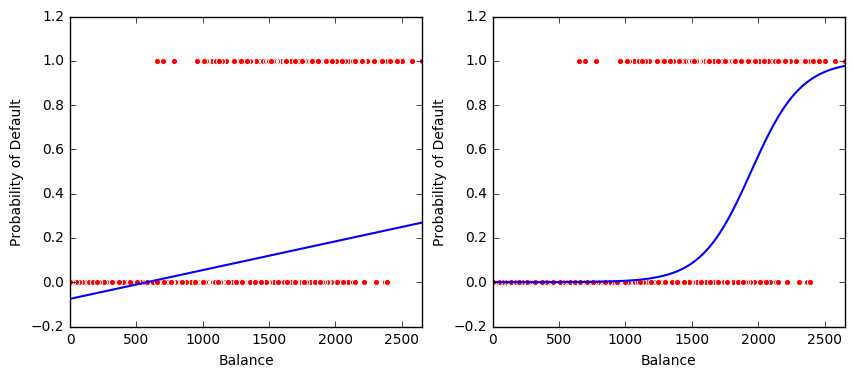

In [4]:
# Here we encode the labels for the target to 0 (does not default) and 1 (defaults)
le = preprocessing.LabelEncoder()
data['default_label'] = le.fit_transform(data['default'])
data['student_yes'] = le.fit_transform(data['student'])

print(data.head())

fig,(ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
p1 = sns.scatterplot('balance','default_label',ax = ax1,data = data, color = 'red')
p2 = sns.scatterplot('balance','default_label',ax = ax2, data = data, color = 'red')
for p in [p1,p2]:
    p.set_xlabel('Balance')
    p.set_ylabel('Probability of Default')
    p.set_xlim((0,max(data['balance'])))

x_train = data['balance']
y_train = data['default_label']
x_train = x_train[:, np.newaxis] # or np.reshape(xtrain,(1,-1))
import numpy as np
x = np.linspace(0,max(data['balance']),100)

from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(x_train, y_train) 
y = ols.coef_*x + ols.intercept_
p1.plot(x,y,'-b')

lgr = linear_model.LogisticRegression(C=1E5)
lgr.fit(x_train, y_train) 
y = 1/(1+np.exp(-1*(lgr.coef_*x + lgr.intercept_))).ravel() # probability to default
p2.plot(x,y,'b')
#or p2.plot(x,lgr.predict_proba(x[:,np.newaxis])[:,1],'r') # Here we can use predict_proba function to the probabilty to not default [0th column] and default [1 st column]

#3 Table 4.1
print "Intercept: {:.4f}".format(lgr.intercept_.ravel()[0])
print "Balance Coefficient: {:.4f}".format(lgr.coef_.ravel()[0])


In [5]:
x_train = data['student_yes']
x_train = x_train[:, np.newaxis] # or np.reshape(xtrain,(1,-1))
y_train = data['default_label']
lgr = linear_model.LogisticRegression(C=1E5)
lgr.fit(x_train, y_train) 

#Table 4.2
print "Labels: {}".format(lgr.classes_)
print "Intercept: {:.4f}".format(lgr.intercept_.ravel()[0])
print "Student [yes] Coefficient: {:.4f}".format(lgr.coef_.ravel()[0])

Labels: [0 1]
Intercept: -3.5041
Student [yes] Coefficient: 0.4049


In [6]:
x_train =data[[ 'balance', 'income', 'student_yes']]

# x_train = x_train[:, np.newaxis] # or np.reshape(xtrain,(1,-1))
# y_train = data['default_label']
y_train = data['default']

lgr = linear_model.LogisticRegression(C=1E5, solver='newton-cg') # if we use the default solver,  the answers dont match the one in text book.
lgr.fit(x_train, y_train) 

# #Table 4.2
print "Labels: {}".format(lgr.classes_)
print "Intercept: {:.4f}".format(lgr.intercept_.ravel()[0])
print "Balance Coefficient: {:.4f}".format(lgr.coef_.ravel()[0])
print "Income Coefficient: {:.4f}".format(lgr.coef_.ravel()[1]*1000)
print "Student Coefficient: {:.4f}".format(lgr.coef_.ravel()[2])

C:\Users\bjuluri.PIENERGY\AppData\Local\Continuum\Anaconda2\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bjuluri.PIENERGY\AppData\Local\Continuum\Anaconda2\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Labels: [u'No' u'Yes']
Intercept: -10.8132
Balance Coefficient: 0.0057
Income Coefficient: 0.0024
Student Coefficient: -0.6616


C:\Users\bjuluri.PIENERGY\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


default    No  Yes  default_rate
student                         
No       6850  206      0.029195
Yes      2817  127      0.043139


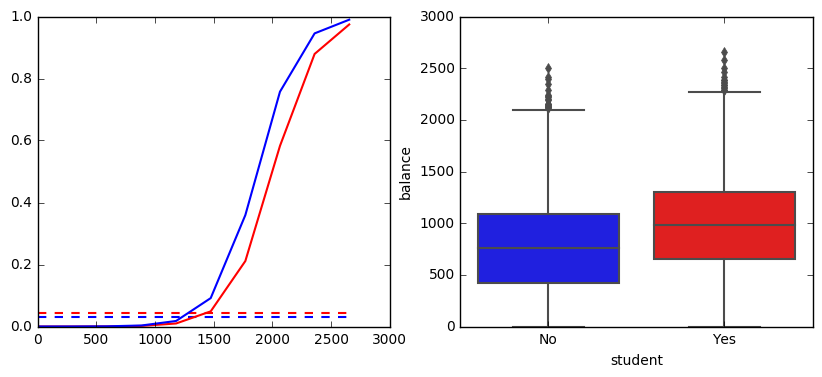

In [7]:


data_student_yes = data.groupby('student').get_group('Yes')
data_student_no = data.groupby('student').get_group('No')

x_train_student_yes =data_student_yes['balance'][:, np.newaxis]
y_train_student_yes = data_student_yes['default']

x_train_student_no = data_student_no['balance'][:, np.newaxis]
y_train_student_no = data_student_no['default']


lgr_student_yes = linear_model.LogisticRegression(C=1E5, solver='newton-cg') # if we use the default solver,  the answers dont match the one in text book.
lgr_student_yes.fit(x_train_student_yes, y_train_student_yes)

lgr_student_no = linear_model.LogisticRegression(C=1E5, solver='newton-cg') # if we use the default solver,  the answers dont match the one in text book.
lgr_student_no.fit(x_train_student_no, y_train_student_no)

x_test = np.linspace(0,max(data['balance']),10)

fig,(ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
ax1.plot(x_test,lgr_student_yes.predict_proba(x_test[:,np.newaxis])[:,1],'r')
ax1.plot(x_test,lgr_student_no.predict_proba(x_test[:,np.newaxis])[:,1],'b')

data_student_default =  data.groupby(['student','default']).size().unstack()
data_student_default['default_rate']  = data_student_default['Yes']/data_student_default.sum(axis = 1)

print data_student_default

ax1.hlines(y = data_student_default['default_rate'].loc['Yes'],xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1],colors= 'r',linestyles = 'dashed')
ax1.hlines(y = data_student_default['default_rate'].loc['No'],xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1],colors= 'b', linestyles = 'dashed')

colors= {'Yes': 'red', 'No': 'blue'}
sns.boxplot(x = 'student' ,y = 'balance', ax = ax2, data = data, palette = colors)


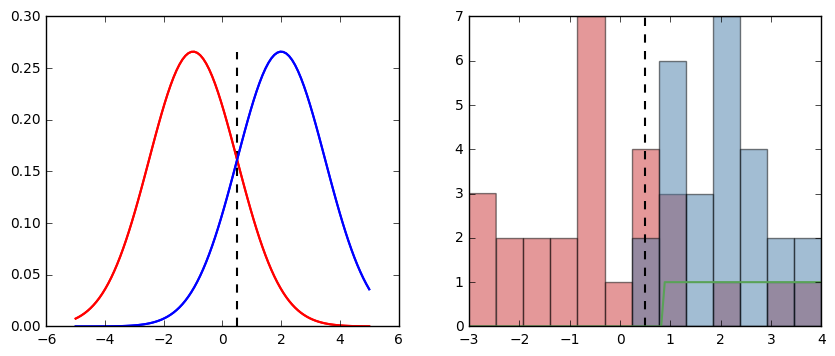

In [8]:
# Figure 4.4
def guassian(x,mu,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi))*np.exp(- (x - mu)**2 / (2 * sigma**2)) 
x = np.linspace(-5,5,100)
mu1 = -1
mu2 = 2
sigma = 1.5
d1 = guassian(x,mu1,sigma)
d2 = guassian(x,mu2,sigma)

fig,(ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
ax1.plot(x, d1, 'r')
ax1.plot(x, d2,'b')

ax1.plot(x, d1, 'r')
ax1.plot(x, d2,'b')
ax1.vlines(x=(mu1+mu2)*0.5,ymin = 0, ymax = ax1.yaxis.get_data_interval()[1], linestyles = 'dashed')

class_1_x = np.random.normal(mu1, sigma, 30)
class_1_label = np.zeros(class_1_x.size)

class_2_x = np.random.normal(mu2, sigma, 30)
class_2_label = np.zeros(class_2_x.size)+1

x_train = np.reshape(np.concatenate((class_1_x, class_2_x)), (-1,1))
y_train = np.concatenate((class_1_label,class_2_label))



ax2.hist(class_1_x, bins= np.linspace(-3,4,14), alpha=.5)
ax2.hist(class_2_x, bins= np.linspace(-3,4,14), alpha=.5)
ax2.vlines(x=(mu1+mu2)*0.5,ymin = 0, ymax = ax2.yaxis.get_data_interval()[1], linestyles = 'dashed')


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
xtest = np.reshape(np.linspace(-3,4,100),(-1,1))
ytest = lda.predict(xtest)
plt.plot(xtest,ytest)



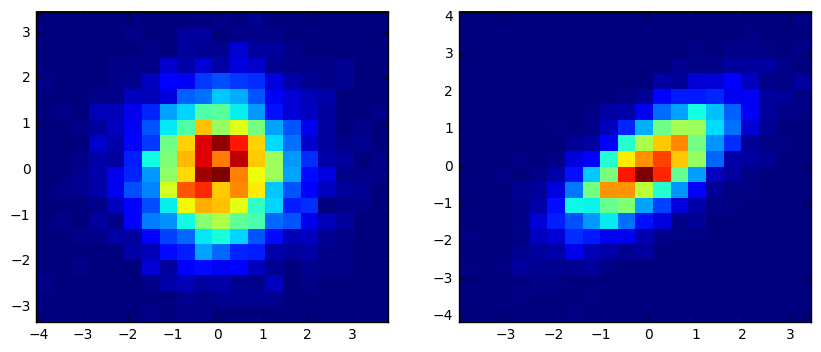

In [9]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 5000).T
h,xedges,yedges,img = ax1.hist2d(x, y,bins = 20)

cov = [[1, 0.7], [0.7, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 5000).T
h,xedges,yedges,img = ax2.hist2d(x, y,bins = 20)
plt.show()


In [10]:
# covariance matrix is common to all classes
cov_all_classes = np.array([[1,0.7],[0.7,1]])
N = 1000
# class 1
mu_vec1 = np.array([-1,-1])
k1_samples = np.random.multivariate_normal(mu_vec1, cov_all_classes, N)

# class2
mu_vec2 = np.array([3,0])
k2_samples = np.random.multivariate_normal(mu_vec2, cov_all_classes, N)

# class3
mu_vec3 = np.array([1.5,2.5])
k3_samples = np.random.multivariate_normal(mu_vec3, cov_all_classes, N)


In [11]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
output_notebook()

Loading BokehJS ...

In [12]:
# pick the first 20 from each class for fitting with LDA
test_samples = 20
k1_samples_train = k1_samples[:test_samples]
k2_samples_train = k2_samples[:test_samples]
k3_samples_train = k3_samples[:test_samples]

from numpy.linalg import inv
mu_vec1_train = np.mean(k1_samples_train, axis = 0) 
mu_vec2_train = np.mean(k2_samples_train, axis = 0) 
mu_vec3_train = np.mean(k3_samples_train, axis = 0) 
print "Means of each training class"
print mu_vec1_train, mu_vec2_train, mu_vec3_train

cov_vec1_train = np.cov(k1_samples_train.T)
cov_vec2_train = np.cov(k2_samples_train.T)
cov_vec3_train = np.cov(k3_samples_train.T)
cov_train = (cov_vec1_train+ cov_vec2_train+cov_vec3_train)/3
print "cov of each class"
print cov_vec1_train, cov_vec2_train, cov_vec3_train
print "mean of all cov"
print cov_train

def LDA(x,cov,mu,pid):
    discrimnant = [np.dot(x.T, inv(cov)).dot(mu_k) - 0.5*np.dot(mu_k.T,inv(cov)).dot(mu_k)+np.log(pid[i]) for i, mu_k in enumerate(mu)]
    return np.argmax(discrimnant)+1
        
mu = [mu_vec1_train, mu_vec2_train, mu_vec3_train]
pid = [1.0/3]*3 # pi_k for all classes is 3, because they all have same number of training examples
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
xx,yy = np.meshgrid(x,y)
Z = np.apply_along_axis(LDA, 0, [xx.ravel(),yy.ravel()], cov, mu, pid).reshape(xx.shape)



Means of each training class
[-1.41439507 -1.21050865] [ 3.0385524  -0.06883013] [ 1.44804185  2.3587504 ]
cov of each class
[[ 0.82137271  0.77233216]
 [ 0.77233216  1.25270767]] [[ 0.68918052  0.58992899]
 [ 0.58992899  1.16178856]] [[ 0.89103617  0.69356583]
 [ 0.69356583  0.77338923]]
mean of all cov
[[ 0.8005298   0.68527566]
 [ 0.68527566  1.06262849]]


In [13]:

p1 = figure(plot_width=300, plot_height=300)
p1.circle(x = k1_samples[:,0], y= k1_samples[:,1], color = 'green')
p1.circle(x = k2_samples[:,0], y= k2_samples[:,1], color = 'blue')
p1.circle(x = k3_samples[:,0], y= k3_samples[:,1], color = 'red')
p1.xaxis.axis_label = 'X1'
p1.yaxis.axis_label = 'X2'

p2 = figure(plot_width=300, plot_height=300, x_range=(-4, 4), y_range=(-4, 4))
p2.image(image=[Z], x=-4, y=-4, dw=8, dh=8, palette="Spectral11")
p2.circle(x = k1_samples_train[:,0], y= k1_samples_train[:,1], color = 'green')
p2.circle(x = k2_samples_train[:,0], y= k2_samples_train[:,1], color = 'blue')
p2.circle(x = k3_samples_train[:,0], y= k3_samples_train[:,1], color = 'red')
p2.xaxis.axis_label = 'X1'
p2.yaxis.axis_label = 'X2'

show(gridplot(p1, p2, ncols=2))

In [14]:
# Let use LDA on Default data

             precision    recall  f1-score   support

         No       0.97      1.00      0.99      9667
        Yes       0.79      0.23      0.36       333

avg / total       0.97      0.97      0.96     10000

76.8768768769
0.206889417606


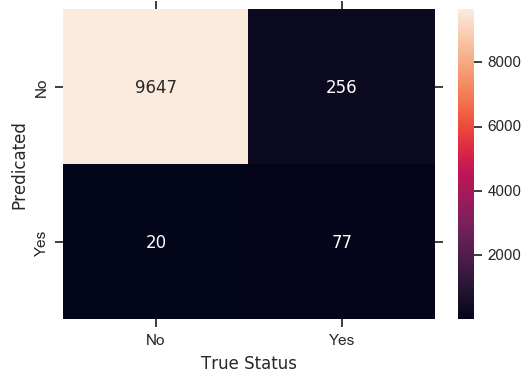

In [15]:
x_train =data[[ 'balance', 'income']]
y_train = data['default']
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(x_train, y_train).predict(x_train)

from sklearn.metrics import confusion_matrix, classification_report
cf = confusion_matrix(y_train,y_pred)
print classification_report(y_train,y_pred)
import seaborn as sns; sns.set()
h = sns.heatmap(cf.T,annot=True, fmt="d", xticklabels = lda.classes_, yticklabels = lda.classes_)
h.set_xlabel('True Status')
h.set_ylabel('Predicated')


def FNR(cf):
    # "FNR = FN/(FN+TP): "
    return (cf[1,0].astype(float)/(cf[1,0]+cf[1,1]))
def FPR(cf):
    # "FPR/Fall-out = FP/(FP+TN): "
    return (cf[0,1].astype(float)/(cf[0,1]+cf[0,0]))

def TPR(cf):
    # "TPR/Recall/Sensitivity = TP/(TP+FN): "
    return cf[1,1].astype(float)/(cf[1,1]+cf[1,0])

def TNR(cf):
    # "TNR/Specificity/Selectivity = TN/(TN+FP): "
    return cf[0,0].astype(float)/(cf[0,0]+cf[0,1])
    
print FNR(cf)*100
print FPR(cf)*100




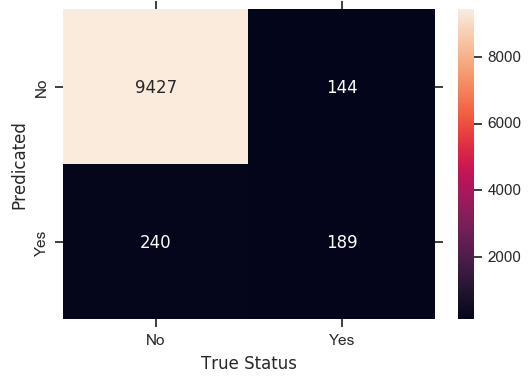

In [16]:

y_pred = lda.fit(x_train, y_train).predict_proba(x_train)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['default'])
le.classes_

threshold = 0.2
y_pred = le.inverse_transform((y_pred[:,1] >= threshold).astype(int))# if the probability of the "Yes" label is more than the threhold 
cf = confusion_matrix(y_train,y_pred)

h = sns.heatmap(cf.T,annot=True, fmt="d", xticklabels = lda.classes_, yticklabels = lda.classes_)
h.set_xlabel('True Status')
h.set_ylabel('Predicated')



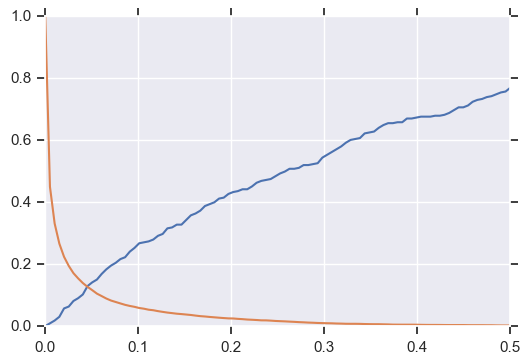

In [17]:
y_pred = lda.fit(x_train, y_train).predict_proba(x_train)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['default'])
le.classes_

threshold = np.linspace(0,0.5,100)
fnr = []
fpr = []
tpr = []
for t in threshold:
    cf = confusion_matrix(y_train,le.inverse_transform((y_pred[:,1] >= t).astype(int)))
    fnr.append(FNR(cf))
    fpr.append(FPR(cf))
    tpr.append(TPR(cf))
  
plt.plot(threshold, fnr)
plt.plot(threshold, fpr)

plt.show()

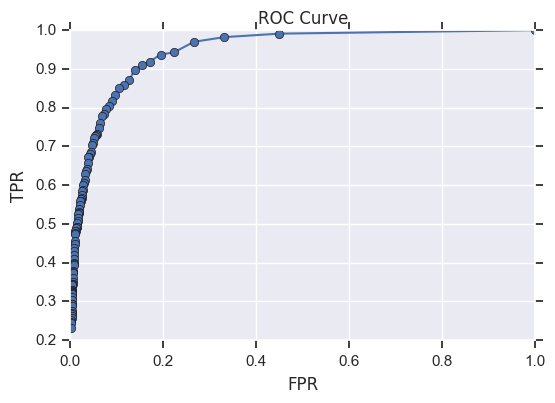

In [18]:
# figure 4.8
plt.plot(fpr,tpr,'-o')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()



In [19]:
a+b

NameError: name 'a' is not defined